In [7]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from scipy.io import wavfile

In [105]:
def rectifier(x):
    return (x + np.abs(x)) / 2

def spectral_flux(x):
    N = 2048
    overlap = int(0.785 * N)
    freq, times, x_fourier = signal.stft(x, fs=100, window="hamming", nperseg=N, noverlap=overlap)
    x_fourier = x_fourier.T
    flux = np.zeros(x_fourier.shape[0])
    for n in range(x_fourier.shape[0]):
        flux[n] = np.sum(rectifier(np.abs(x_fourier[n]) - np.abs(x_fourier[n-1])))
    return flux

def detect_onsets(onset_fun, w=3, m=3, delta=4e-1):
    onset_normalized = (onset_fun - np.mean(onset_fun)) / np.std(onset_fun)
    peaks = []
    
    for n in range(w + 1, onset_normalized.size - w):
        first = True
        second = True
        
        # first condition
        for k in range(n - w, n + w + 1):
            if onset_normalized[n] < onset_normalized[k]:
                first = False
                
        # second condition
        if onset_normalized[n] < (np.sum(onset_normalized[n - w:n + w + 1]) / (m * w + w + 1)) + delta:
            second = False
            
        if first and second:
            peaks.append(n * 441)
    
    return peaks

In [106]:
sr, data = wavfile.read("drums.wav")
data = data.sum(axis=1) / 2

peaks = detect_onsets(spectral_flux(data))

/tmp/ipykernel_150/3155713152.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sr, data = wavfile.read("drums.wav")


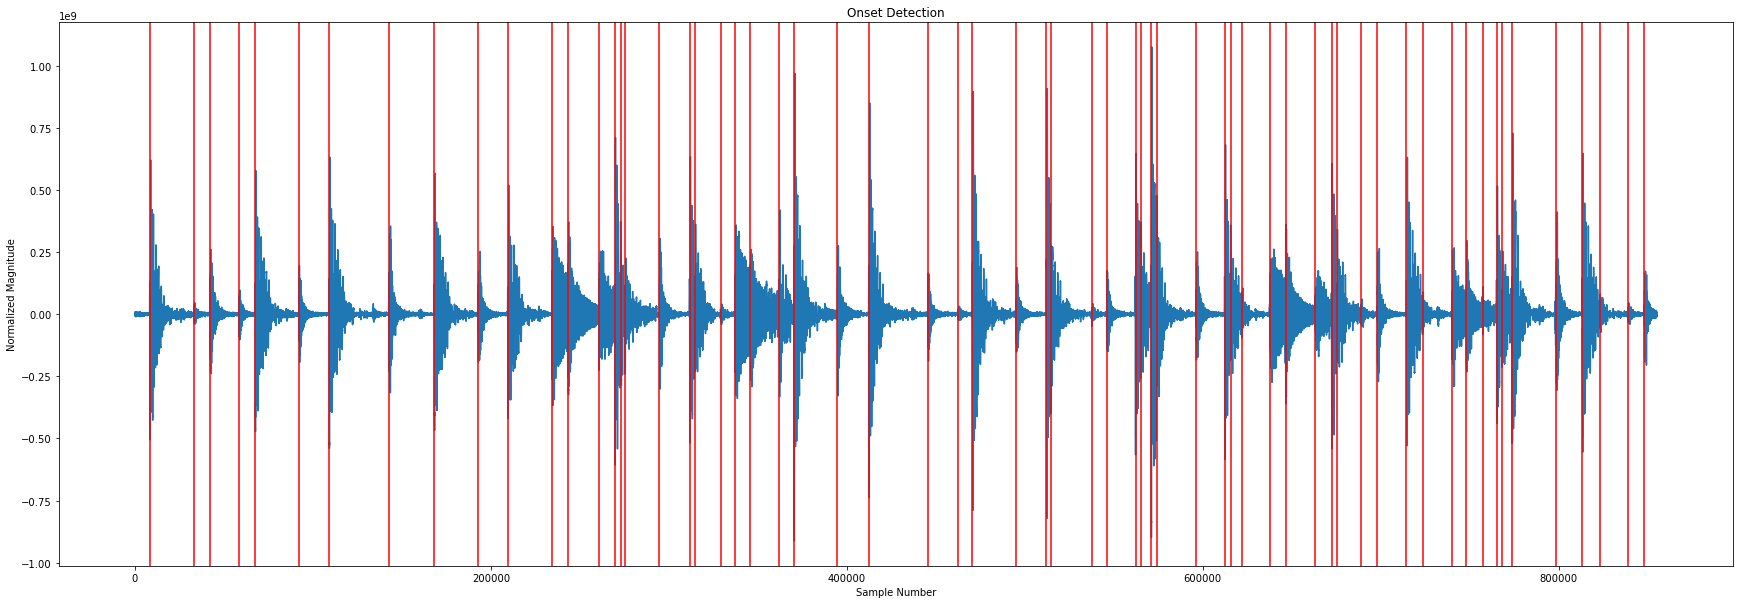

In [107]:
plt.figure(figsize = (30, 10))
plt.plot(data)
plt.xlabel("Sample Number")
plt.ylabel("Normalized Magnitude")
plt.title("Onset Detection")
for peak in peaks:
    plt.axvline(peak, color="r")
plt.savefig("onset_detect.png")